In [1]:
# Import neccessary packages

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch 
import torch.nn as nn
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.datasets import load_iris

# iris dataset is available from scikit-learn package
iris = load_iris()

# Load the X (features) and y (targets) for training
X_train = iris['data']
y_train = iris['target']

# Load the name labels for features and targets
feature_names = iris['feature_names']
names = iris['target_names']

# Feel free to perform additional data processing here (e.g. standard scaling)
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)

In [5]:
# Print the first 10 training samples for both features and targets

print(scaled_X_train[:10, :], y_train[:10]) 

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]] [0 0 0 0 0 0 0 0 0 0]


In [6]:
# Print the dimensions of features and targets

print(scaled_X_train.shape, y_train.shape)

(150, 4) (150,)


In [7]:
# feature_names contains name for each column in X_train
# For targets, 0 -> setosa, 1 -> versicolor, 2 -> virginica

print(feature_names, names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


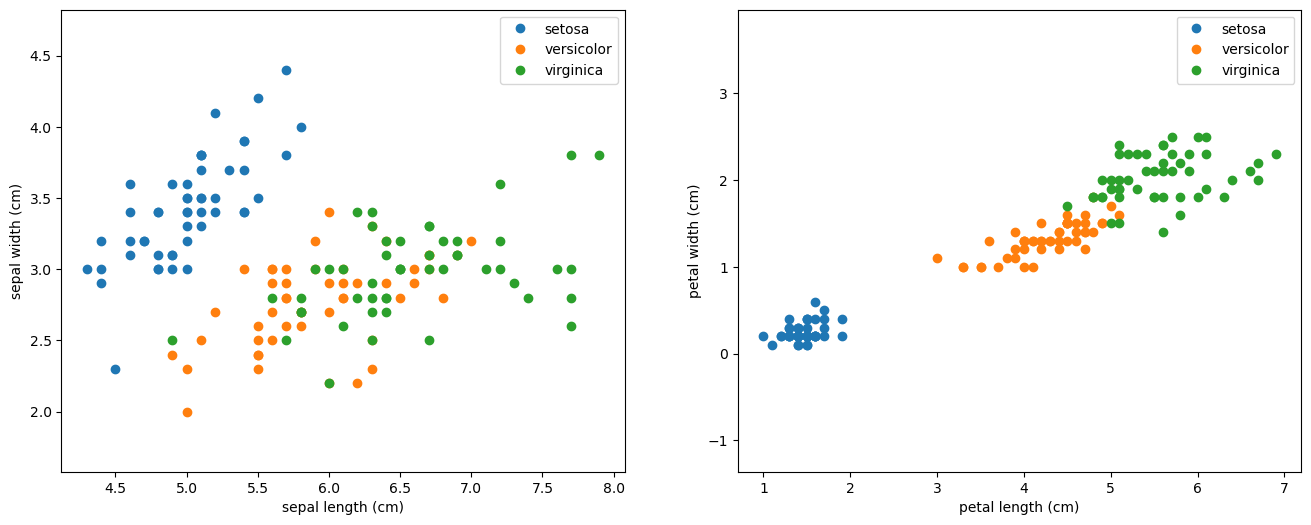

In [8]:
# We can visualize the dataset before training

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# enumerate picks up both the index (0, 1, 2) and the element ('setosa', 'versicolor', 'virginica') from "names"
# loop 1: target = 0, target_name = 'setosa'
# loop 2: target = 1, target_name = 'versicolor' etc

for target, target_name in enumerate(names):
    
    # Subset the rows of X_train that fall into each flower category using boolean mapping
    X_plot = X_train[y_train == target]
    
    # Plot the sepal length versus sepal width for the flower category
    ax1.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)

# Label the plot
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend()

# Repeat the above process but with petal length versus petal width
for target, target_name in enumerate(names):
    
    X_plot = X_train[y_train == target]
    
    ax2.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
    
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend()

In [9]:
class irisClassification(torch.nn.Module):
    
    def __init__(self, input_dim, output_dim):
        
        super(irisClassification, self).__init__()
        
        #create a linear layer with the same input dimension and an arbitrary amount of hidden nodes.
        self.layer1 = torch.nn.Linear(input_dim, 20)
        
        #create another linear layer with hidden nodes.
        self.layer2 = torch.nn.Linear(20, 40)
        
        #create another linear layer with hidden nodes and the same output dimension.
        self.layer3 = torch.nn.Linear(40, output_dim)
        
        #create an activation layer
        self.layer4=nn.Sigmoid()
        
    def forward(self, x):
        
        #this represents the flow of information through the neural network since we have three layers and an activation function
        x = self.layer4(self.layer1(x))
        x = self.layer2(x)
        x = self.layer3(x)
        out = x
        
        return out

In [10]:

model = irisClassification(input_dim=4, output_dim=1)
learning_rate = .01
epochs  = 30

loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [11]:


train_loss_list=[]

In [12]:
X_train = torch.from_numpy(scaled_X_train).float()
y_train = torch.from_numpy(y_train).float()

In [13]:
#use a batch size of 150 to show that we are training the model on each set of data at a time in order to
#avoid getting stuck at the model just predicting 1 
n_batches = 150
batch_size=150//n_batches
for epoch in range(epochs):
    #shuffling the data in order to avoid a prediction of 1 each time 
    shuffle = np.random.permutation(X_train.shape[0])
    X_train = X_train[shuffle]
    y_train = y_train[shuffle]
    #going through each batch and training in terms of the batch size
    for i in range (n_batches):
        X_train_i = X_train[i*batch_size:(i+1)*batch_size]
        y_train_i = y_train[i*batch_size:(i+1)*batch_size]
        y_pred_i = model(X_train_i)
        
        #computing the loss with actual values
        loss_i=loss_func(y_pred_i, y_train_i)
        
        #empyting the gradient buffer
        optimizer.zero_grad()
        
        #compute the changes that need to be made to the weights/biases
        loss_i.backward()
        
        #updating the weights/biases
        optimizer.step()
        
        #updating the loss list so that we can plot it
        train_loss_list.append(loss_i.item())
        
       

/Applications/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Text(0, 0.5, 'loss')

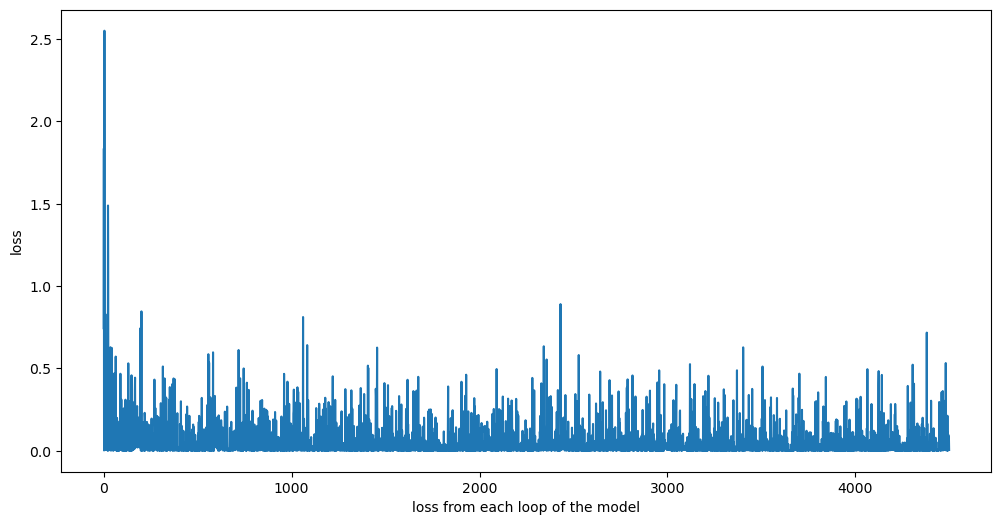

In [14]:
# Plot your training loss throughout the training
# Include proper x and y labels for the plot
plt.figure(figsize=(12, 6))

# YOUR CODE HERE
#plotting the loss as a function of the epochs
plt.plot(train_loss_list)
plt.xlabel('loss from each loop of the model')
plt.ylabel('loss')

In [15]:
with torch.no_grad():
    
    y_pred_all=model(X_train)
    
    # Compare your model predictions with targets (y_train) to compute the training accuracy     
    #rounding the predicted data to the nearest integer
    predicted = np.round(y_pred_all)
    

#creating a boolean true/false matrix 
Matches= np.where(predicted.numpy()==y_train.numpy().reshape(150,1))
#finding the number of true values in the matrix
correct = np.count_nonzero(Matches)
#calculating the accuracy
print((correct/150)*100)

96.66666666666667
